In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

from kaggle_prediction_interval_birthweight.model.sampling_utils import (
    compute_highest_density_interval,
)
from kaggle_prediction_interval_birthweight.workflow.metric import score
from kaggle_prediction_interval_birthweight.data.data_processing import DataProcessor
from kaggle_prediction_interval_birthweight.model.linear_regression import (
    RidgeRegressor,
)
from kaggle_prediction_interval_birthweight.model.hist_gradient_boosting import (
    HistBoostRegressor,
)
from kaggle_prediction_interval_birthweight.model.neural_network import (
    MissingnessNeuralNet,
)
from kaggle_prediction_interval_birthweight.model.ensembler import (
    Ensembler,
)

In [3]:
data = pd.read_csv("../data/train.csv")
data_test = pd.read_csv("../data/test.csv")

Ensembler fold 1 of 3 begins.
Training the ridge regression model.
Training the histogram boosting model.
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training the neural network model.
1136/1136 [==============================] - 1s 411us/step
Ensembler fold 2 of 3 begins.
Training the ridge regression model.
Training the histogram boosting model.
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training the neural network model.
1124/1124 [==============================] - 0s 372us/step
Ensembler fold 3 of 3 begins.
Training the ridge regression model.
Training the histogram boosting model.
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training the neural network model.
1119/1119 [==============================] - 0s 388us/step
Training the ensemble model.
Fitting 5 f

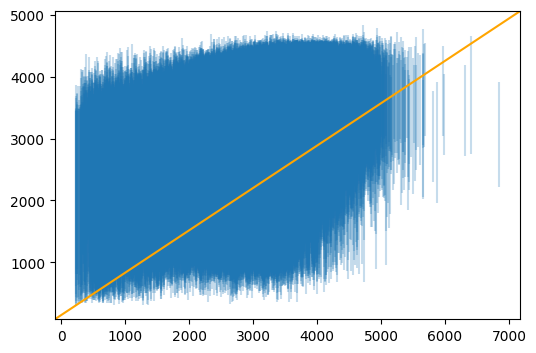

In [4]:
ensembler = Ensembler()
ensembler.fit(data)

lower_ensemble, upper_ensemble = ensembler.predict_intervals(data)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.vlines(x=data["DBWT"], ymin=lower_ensemble, ymax=upper_ensemble, alpha=0.25)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color="orange")
plt.show()

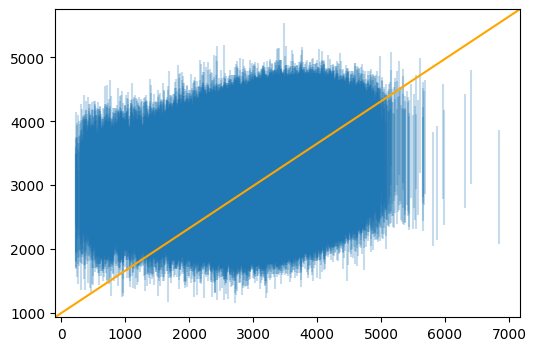

In [5]:
train_processor = DataProcessor(model_type="linear regression")
X, y = train_processor(data)

test_processor = DataProcessor(
    model_type="linear regression",
    feature_categories=train_processor.feature_categories,
    standardization_parameters=train_processor.standardization_parameters,
)
X_test = test_processor(data_test)

ridge_regressor = RidgeRegressor().fit(X, y)


lower_ridge, upper_ridge = ridge_regressor.predict_intervals(X)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.vlines(x=data["DBWT"], ymin=lower_ridge, ymax=upper_ridge, alpha=0.25)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color="orange")
plt.show()

Epoch 1/200
109/109 [==============================] - 1s 6ms/step - loss: 1.5477
Epoch 2/200
109/109 [==============================] - 1s 6ms/step - loss: 1.2914
Epoch 3/200
109/109 [==============================] - 1s 6ms/step - loss: 1.2145
Epoch 4/200
109/109 [==============================] - 1s 6ms/step - loss: 1.1793
Epoch 5/200
109/109 [==============================] - 1s 6ms/step - loss: 1.1528
Epoch 6/200
109/109 [==============================] - 1s 6ms/step - loss: 1.1289
Epoch 7/200
109/109 [==============================] - 1s 6ms/step - loss: 1.1072
Epoch 8/200
109/109 [==============================] - 1s 6ms/step - loss: 1.0876
Epoch 9/200
109/109 [==============================] - 1s 7ms/step - loss: 1.0690
Epoch 10/200
109/109 [==============================] - 1s 7ms/step - loss: 1.0495
Epoch 11/200
109/109 [==============================] - 1s 7ms/step - loss: 1.0270
Epoch 12/200
109/109 [==============================] - 1s 7ms/step - loss: 1.0056
Epoch 13/200


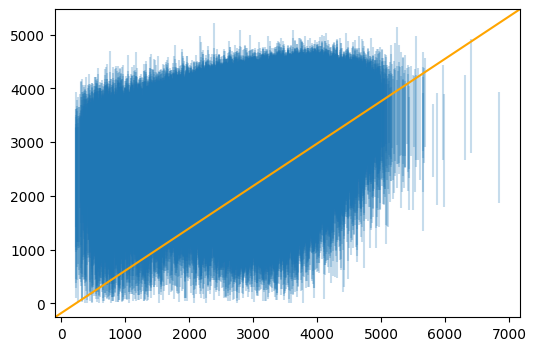

In [6]:
train_processor = DataProcessor(model_type="neural network")
X, y = train_processor(data)

nn = MissingnessNeuralNet(units=10, n_layers=1, verbose=1, n_epochs=200)
nn.fit(X, y)

lower_nn, upper_nn = nn.predict_intervals(X)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.vlines(x=data["DBWT"], ymin=lower_nn, ymax=upper_nn, alpha=0.25)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color="orange")
plt.show()

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


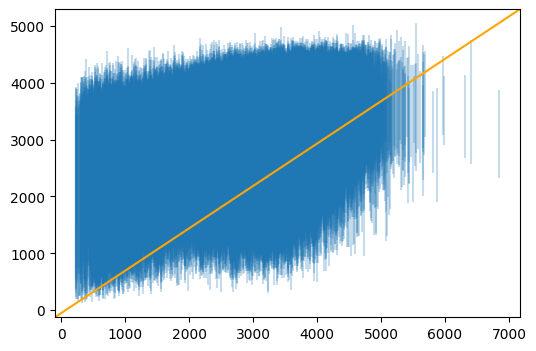

In [7]:
train_processor = DataProcessor(model_type="xgboost")
X, y = train_processor(data)

histboost_regressor = HistBoostRegressor()
histboost_regressor.fit(X, y)

lower_histboost, upper_histboost = histboost_regressor.predict_intervals(X)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.vlines(x=data["DBWT"], ymin=lower_histboost, ymax=upper_histboost, alpha=0.25)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color="orange")
plt.show()

Coverage is 90.0%


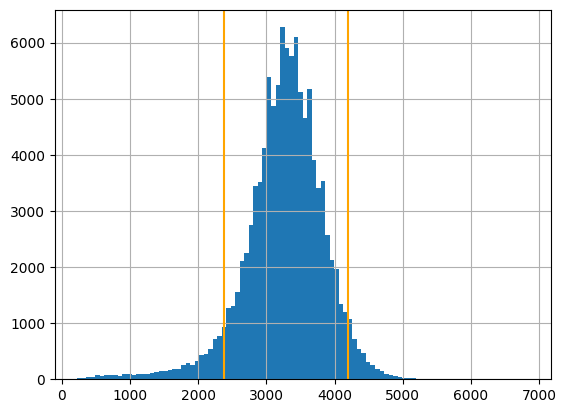

In [8]:
lower, upper = compute_highest_density_interval(data["DBWT"])

print(f"Coverage is {data['DBWT'].between(lower, upper).mean() * 100:.1f}%")

data["DBWT"].hist(bins=100)
plt.axvline(lower, color="orange")
plt.axvline(upper, color="orange")
plt.show()

In [9]:
nois, coverage = score(data["DBWT"].values, lower, upper, 0.9)

print(f"NOIS is {nois:.1f}, and coverage is {coverage*100:.1f}%")

NOIS is 1904.4, and coverage is 90.0%


In [10]:
nois, coverage = score(data["DBWT"].values, lower_ridge, upper_ridge, 0.9)

print(f"NOIS is {nois:.1f}, and coverage is {coverage*100:.1f}%")

NOIS is 1862.5, and coverage is 91.4%


In [11]:
nois, coverage = score(data["DBWT"].values, lower_histboost, upper_histboost, 0.9)

print(f"NOIS is {nois:.1f}, and coverage is {coverage*100:.1f}%")

NOIS is 1597.4, and coverage is 90.0%


In [12]:
nois, coverage = score(data["DBWT"].values, lower_nn, upper_nn, 0.9)

print(f"NOIS is {nois:.1f}, and coverage is {coverage*100:.1f}%")

NOIS is 1740.1, and coverage is 90.6%


In [13]:
nois, coverage = score(data["DBWT"].values, lower_ensemble, upper_ensemble, 0.9)

print(f"NOIS is {nois:.1f}, and coverage is {coverage*100:.1f}%")

NOIS is 1644.5, and coverage is 90.7%
